# 1、数据清洗

In [3]:
# 导入python相关的模块
import numpy as np
import pandas as pd
# matplotlib中pyplot子类绘图API，提供绘图的函数
import matplotlib.pyplot as plt    # matplotlib绘图模块
import seaborn as sns   # seaborn的可视化模块
# python处理时间的模块
from datetime import datetime   
plt.rcParams['font.family'] = 'SimHei'  # 替换为你选择的字体

In [6]:
# 读取数据，由于数据集比较大，如果计算机内存不够，打不开此数据集，就导入我处理好的数据 user_data.csv
# 使用pandas读取数据
user_action = pd.read_csv("data/jdata_action.csv")
# user_action.head()
# user_id   用户唯一标识
# sku_id   商品唯一标识
# action_time   行为时间
# module_id   如果是下单，存储订单号；如果是浏览，存储sessionid
# type   行为类型：1.浏览；2.下单；3.关注；4.评论；5.加购物车	
user_action.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37214269 entries, 0 to 37214268
Data columns (total 5 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   user_id      int64 
 1   sku_id       int64 
 2   action_time  object
 3   module_id    int64 
 4   type         int64 
dtypes: int64(4), object(1)
memory usage: 1.4+ GB


In [8]:
# 筛选user_action数据框中的数据
# 条件：action_time列的只大于'2018-03-30'且小于'2018-04-15'
user_data = user_action[
    (user_action['action_time'] > '2018-03-30') & (user_action['action_time'] < '2018-04-15')
]

# user_data.head()
user_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7540394 entries, 17 to 37214234
Data columns (total 5 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   user_id      int64 
 1   sku_id       int64 
 2   action_time  object
 3   module_id    int64 
 4   type         int64 
dtypes: int64(4), object(1)
memory usage: 345.2+ MB


In [9]:
# 将user_data数据保存到data目录
user_data.to_csv('data/user_data.csv',sep=',')

In [4]:
# 从csv中读取数据并查看前10行数据
# 读取数据并将第一列设置为索引项
behavior = pd.read_csv('data/user_data.csv',index_col=0)
behavior.head(10)

,user_id,sku_id,action_time,module_id,type
17,1455298,208441,2018-04-11 15:21:43,6190659,1
18,1455298,334318,2018-04-11 15:14:54,6190659,1
19,1455298,237755,2018-04-11 15:14:13,6190659,1
20,1455298,6422,2018-04-11 15:22:25,6190659,1
21,1455298,268566,2018-04-11 15:14:26,6190659,1
22,1455298,115915,2018-04-11 15:13:35,6190659,1
23,1455298,208254,2018-04-11 15:22:16,6190659,1
24,1455298,177209,2018-04-14 14:09:59,6628254,1
25,1455298,71793,2018-04-14 14:10:29,6628254,1
26,1455298,141950,2018-04-12 15:37:53,10207258,1


In [5]:
behavior[:10]

,user_id,sku_id,action_time,module_id,type
17,1455298,208441,2018-04-11 15:21:43,6190659,1
18,1455298,334318,2018-04-11 15:14:54,6190659,1
19,1455298,237755,2018-04-11 15:14:13,6190659,1
20,1455298,6422,2018-04-11 15:22:25,6190659,1
21,1455298,268566,2018-04-11 15:14:26,6190659,1
22,1455298,115915,2018-04-11 15:13:35,6190659,1
23,1455298,208254,2018-04-11 15:22:16,6190659,1
24,1455298,177209,2018-04-14 14:09:59,6628254,1
25,1455298,71793,2018-04-14 14:10:29,6628254,1
26,1455298,141950,2018-04-12 15:37:53,10207258,1


In [6]:
# 查看数据信息
behavior.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7540394 entries, 17 to 37214234
Data columns (total 5 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   user_id      int64 
 1   sku_id       int64 
 2   action_time  object
 3   module_id    int64 
 4   type         int64 
dtypes: int64(4), object(1)
memory usage: 345.2+ MB


In [7]:
# 计算并显示behavior数据框中每列的缺失值数量
behavior.isnull().sum()

user_id        0
sku_id         0
action_time    0
module_id      0
type           0
dtype: int64

In [8]:
# behavior.head(10)
behavior['action_time'] = pd.to_datetime(behavior['action_time'],format='mixed',errors='coerce')
# to_datetime:用于将字符串转换为日期时间对象
# mixed:指定日期的时间格式，这里指的是混合格式
# errors='coerce' 如果转换失败，将无效解析置为 NaT(缺失值)

# behavior.info()
# behavior.isnull().sum()
# behavior.head(10)

# 将action_time列的日期部分提取出来
behavior['date'] = behavior['action_time'].dt.date  # 日期
# 将action_time列的时间部分提取出来
behavior['hour'] = behavior['action_time'].dt.hour  # 时间
# 将日期转换成周几（星期几）
behavior['weekday'] = behavior['action_time'].dt.day_name() # 周


# date 日期部分 （年-月-日）
# hour 小时部分（0-23）
# weekday 星期几的名称
behavior.head(10)

,user_id,sku_id,action_time,module_id,type,date,hour,weekday
17,1455298,208441,2018-04-11 15:21:43,6190659,1,2018-04-11,15,Wednesday
18,1455298,334318,2018-04-11 15:14:54,6190659,1,2018-04-11,15,Wednesday
19,1455298,237755,2018-04-11 15:14:13,6190659,1,2018-04-11,15,Wednesday
20,1455298,6422,2018-04-11 15:22:25,6190659,1,2018-04-11,15,Wednesday
21,1455298,268566,2018-04-11 15:14:26,6190659,1,2018-04-11,15,Wednesday
22,1455298,115915,2018-04-11 15:13:35,6190659,1,2018-04-11,15,Wednesday
23,1455298,208254,2018-04-11 15:22:16,6190659,1,2018-04-11,15,Wednesday
24,1455298,177209,2018-04-14 14:09:59,6628254,1,2018-04-14,14,Saturday
25,1455298,71793,2018-04-14 14:10:29,6628254,1,2018-04-14,14,Saturday
26,1455298,141950,2018-04-12 15:37:53,10207258,1,2018-04-12,15,Thursday


In [9]:
# 删除behavior数据框中与分析无关的列 module_id
behavior = behavior.drop('module_id',axis=1)
# axis 指定操作轴，axis=0按行删除，axis=1按列删除
# 行为类型：1.浏览；2.下单；3.关注；4.评论；5.加购物车

In [10]:
behavior_type = {1:'pv',2:'pay',3:'fav',4:'comm',5:'cart'}
# apply函数lambda函数将每个数字类型的行为标签转换为相对应的字符类型
behavior['type'] = behavior['type'].apply(lambda x: behavior_type[x])
# 重置DataFrame 的索引，丢弃原来的索引
behavior.reset_index(drop=True,inplace=True)
# # drop=True  表示丢弃原来的索引，不讲其作为新的列添加到DF中
# # inplace=True 表示直接在原DF上修改，而不返回一个新的DF

In [11]:
behavior.head()

,user_id,sku_id,action_time,type,date,hour,weekday
0,1455298,208441,2018-04-11 15:21:43,pv,2018-04-11,15,Wednesday
1,1455298,334318,2018-04-11 15:14:54,pv,2018-04-11,15,Wednesday
2,1455298,237755,2018-04-11 15:14:13,pv,2018-04-11,15,Wednesday
3,1455298,6422,2018-04-11 15:22:25,pv,2018-04-11,15,Wednesday
4,1455298,268566,2018-04-11 15:14:26,pv,2018-04-11,15,Wednesday


# 2、分析模型构建指标

## 2.1 流量指标分析
pv(总访问量)、uv(总访客数)、消费用户数占比、消费用户总访问量占比、消费用户人均访问量、跳失率

### 2.1.1 pv(总访问量)、uv(总访客数)

In [12]:
# 总访问量
pv = behavior[behavior['type'] == 'pv']['user_id'].count()
# 总访客数
uv = behavior['user_id'].nunique()
# nunique 计算唯一值（不重复）的数量
# 消费用户数
user_pay = behavior[behavior['type'] == 'pay'] ['user_id'].unique()
# unique 用于获取series和Dataframe 列中的唯一值（不重复值）
user_pay

# 日均访问量
# 389323.5625
pv_per_day = pv / behavior['date'].nunique()


# 人均访问量
# 8.5453050171546
# 总访问量除以总访客数得到人均访问量
pv_per_user = pv / uv
pv_per_user

# 消费用户访问量
# 3918000
# 筛选出所有消费用户的行为数据，计算消费用户行为类型为pv的数量
pv_pay = behavior[behavior['user_id'].isin(user_pay)]['type'].value_counts().pv
# behavior[behavior['user_id'].isin(user_pay)]  筛选出所有消费用户的行为数据
# ['type'].value_counts().pv 计算消费用户中行为类型为pv的数量，若不存在则返回0


# 消费用户数占比user_pay_rate
# 0.543067579932479
user_pay_rate = len(user_pay) / uv

# 消费用户总访问量占比pv_pay_rate
# 0.6289755452445804
pv_pay_rate = pv_pay / pv


# 消费用户人均访问量pv_per_buy_user
# 9.897088467542703
pv_per_buy_user = pv_pay / len(user_pay)
pv_per_buy_user

np.float64(9.897088467542703)

In [13]:
# 输出所有内容
print('总访问量为:%i' %pv)
print('总访客数为：%i' %uv)
print('消费用户数为：%i' %len(user_pay))
print('日均访问量为：%.3f' %pv_per_day)
print('人均访问量为：%.3f' % pv_per_user)
print('消费用户访问量为：%i' %pv_pay)
print('消费用户数占比为：%.3f%%' %(user_pay_rate * 100))
print('消费用户总访问量占比为：%.3f%%'%(pv_pay_rate * 100))
print('消费用户人均访问量为：%.3f' %pv_per_buy_user)

总访问量为:6229177
总访客数为：728959
消费用户数为：395874
日均访问量为：389323.562
人均访问量为：8.545
消费用户访问量为：3918000
消费用户数占比为：54.307%
消费用户总访问量占比为：62.898%
消费用户人均访问量为：9.897


结论：消费用户人均访问量和总访问量占比都在均值以上，有过消费记录的用户更愿意在网站上花费更多时间，说明网站的购物体验 尚可，
老用户对网站有一定的依赖性，对没有过消费记录的用户让快速了解平台（网站）的使用方法和价值，加强用户和平台之间的粘性。

### 2.1.2 跳失率

In [14]:
# 跳失率：只进行了一次操作就离开的用户数 / 总用户数
# groupby('user_id') 按照user_id进行分组，得到一个分组对象
# ['type'].count()  对每个分组计算type列的计数，即每个用户的行为操作次数
# == 1 返回一个布尔数组，  指每一个用户的行为操作次数是否等于1 
# behavior['type'] count() == 1
# groupby('user_id')['type'].count() == 1

# a = behavior.groupby('user_id')
# b = a['type'].count()
# c = (b == 1)
# c
attrition_rates = sum(behavior.groupby('user_id')['type'].count()== 1) / (behavior['user_id'].nunique())
# 0.2258508366039791

In [15]:
print('跳失率为：%.3f%%'%(attrition_rates * 100))

跳失率为：22.585%


结论：在整个计算周期内（15天）跳失率为22.585%，还是有较多的用户仅做一次操作，需要加强平台首页的吸引力（活动等）

## 2.2 用户消费频次分析

In [16]:
# 单个用户消费总次数
# 从behavior数据框中筛选行为类型为'pay'
# 按照user_id进行分组，计算每个用户的消费次数
total_buy_count = behavior[behavior['type'] == 'pay'].groupby('user_id')['type'].count().to_frame().rename(columns={'type':'total'})
# total_buy_count.head()

#消费次数前十的客户
topbuy10 = total_buy_count.sort_values(by='total',ascending=False)[:10]
# ascending=False 降序排列

# 复购率
# 消费次数大于等于2叫复购
re_buy_rate = total_buy_count[total_buy_count >=2].count() / total_buy_count.count()
# 0.134189


In [17]:
# 将消费次数前十的客户的索引值重置，重置为整数索引，并对total列样式设置
topbuy10.reset_index().style.bar(color='LightPink',subset=['total'])
# style 获取DF的样式对象
# bar 应用条形图样式
    # color 设置填充颜色
    # subset 仅对某一列进行设置

,user_id,total
0,1187177,133
1,502169,68
2,600837,53
3,453216,51
4,1372747,36
5,112205,35
6,1243056,34
7,420489,30
8,1470958,30
9,570913,29


Text(0.5, 1.0, '用户消费总次数')

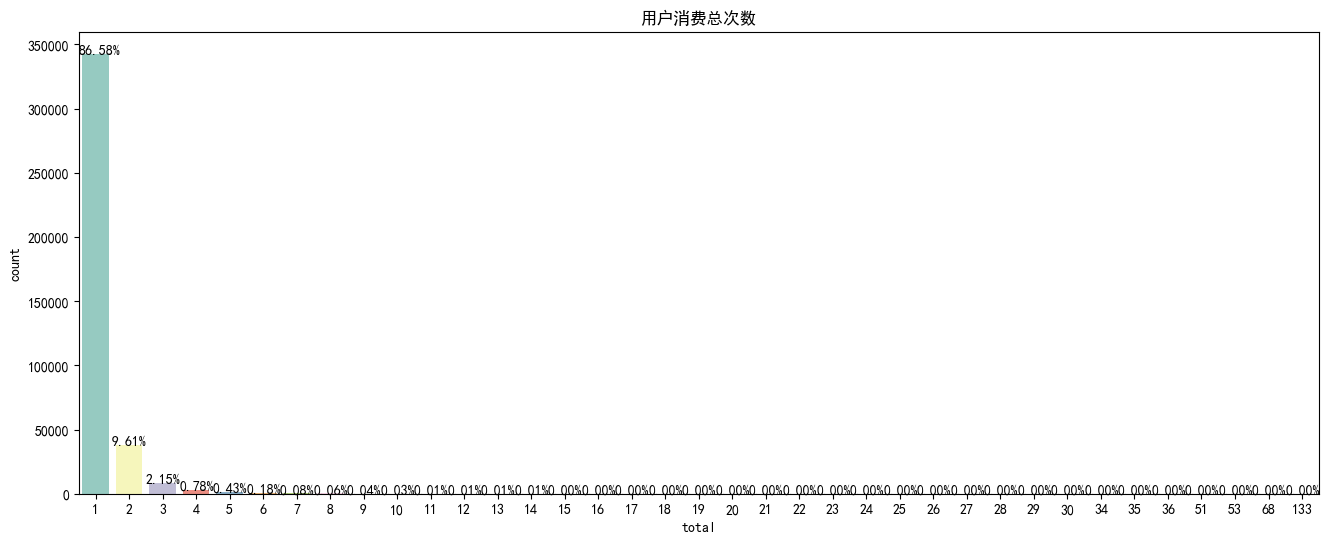

In [20]:
# 单个用户消费总次数可视化
# 重置索引

tbc_box = total_buy_count.reset_index()
# 创建一个画布
# plt.subplot 用于创建子图
fig, ax = plt.subplots(figsize=[16,6])
# 使用sns.countplot()画柱状图
sns.countplot(
    x=tbc_box['total'],
    data=tbc_box,
    # 调色板
    palette='Set3',
    hue=tbc_box['total'],
    legend=False
)

# 遍历图标中的每个条形对象，并添加注释，显示每个消费总次数的百分比
# ax.patches 画布中每个条形
for p in ax.patches:
    # annotate在条形上方添加注释
    ax.annotate(
        # 计算百分比格式化小数后保留2位
        '{:.2f}%'.format(100* p.get_height() / len(tbc_box['total']) ),
        # 设置注释的位置
        (p.get_x()- 0.1,p.get_height())
    )
# 设置标题
plt.title('用户消费总次数')







In [22]:
print('复购率为%.3f%%'%(re_buy_rate.iloc[0] * 100))

复购率为13.419%


复购率较低，应加强老用户召回机制，提升购物体验，也可能因数据量较少，统计周期之内的数据 无法解释完整的购物周期，从而得出结论有误。

## 2.3 用户行为在时间维度的分布

In [23]:
behavior.head()

,user_id,sku_id,action_time,type,date,hour,weekday
0,1455298,208441,2018-04-11 15:21:43,pv,2018-04-11,15,Wednesday
1,1455298,334318,2018-04-11 15:14:54,pv,2018-04-11,15,Wednesday
2,1455298,237755,2018-04-11 15:14:13,pv,2018-04-11,15,Wednesday
3,1455298,6422,2018-04-11 15:22:25,pv,2018-04-11,15,Wednesday
4,1455298,268566,2018-04-11 15:14:26,pv,2018-04-11,15,Wednesday


In [27]:
# 日活跃人数（有一次操作即视为活跃）
daily_active_user = behavior.groupby('date')['user_id'].nunique()
# daily_active_user

# 日消费人数
daily_buy_user = behavior[behavior['type']=='pay'].groupby('date')['user_id'].nunique()
# daily_buy_user

# 日消费人数占比
proprtion_of_buy = daily_buy_user / daily_active_user
# proprtion_of_buy

# 日消费总次数
consumpotion_per_buy = behavior[behavior['type'] == 'pay'].groupby('date')['type'].count()
# consumpotion_per_buy

date
2018-03-30    28768
2018-03-31    29215
2018-04-01    28082
2018-04-02    29342
2018-04-03    29713
2018-04-04    25600
2018-04-05    27378
2018-04-06    30028
2018-04-07    30613
2018-04-08    30696
2018-04-09    32101
2018-04-10    33267
2018-04-11    32496
2018-04-12    31830
2018-04-13    30376
2018-04-14    30644
Name: type, dtype: int64

Text(0.5, 1.0, '日消费人数占比')

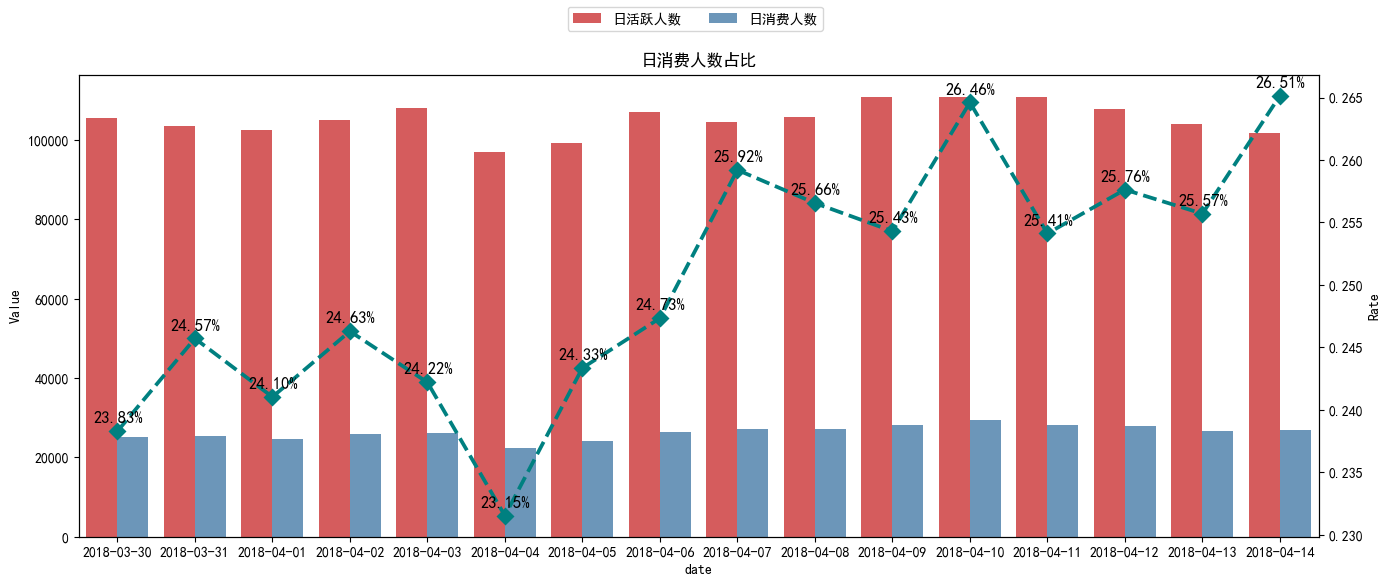

In [42]:
# 可视化：日消费人数占比可视化

# 柱状图
# stack()  将原有数据重塑为长格式
pob_bar = (
    pd.merge(daily_active_user,daily_buy_user,on='date').reset_index()
    .rename(columns={'user_id_x':'日活跃人数','user_id_y':'日消费人数'})
    .set_index('date').stack().reset_index().rename(columns={'level_1':'Variable',0:'Value'})
)

# 线图
# 将日消费人数占比重置索引
pob_line = proprtion_of_buy.reset_index().rename(columns={'user_id':'Rate'})


# 创建图表并设置大小
fig1 = plt.figure(figsize=[16,6])
# 添加第一个子图（点）
ax1 = fig1.add_subplot(111)
# 添加第二个子图
ax2 = ax1.twinx()


# 绘制柱状图
sns.barplot(
    x='date',
    y='Value',
    hue='Variable',
    data=pob_bar,
    ax=ax1,
    alpha=0.8,
    palette='Set1'
)
# 设置柱状图的图例标题为空并移除图例
ax1.legend().set_title('')
# 移除
ax1.legend().remove()


# 绘制线图
sns.pointplot(
    x=pob_line['date'],
    y=pob_line['Rate'],
    data=pob_bar,
    ax=ax2,
    markers='D',
    linestyle='--',
    color='teal'
)

# 在线图上做注释，显示百分比
x = list(range(0,16))
# zip()
for a,b in zip(x,pob_line['Rate']):
    plt.text(a+0.01,b+0.0005,'%.2f%%'%(b*100),ha='center',va='bottom',fontsize=12)

# 设置图例位置和标题
fig1.legend(loc='upper center',ncol=2)
plt.title('日消费人数占比')
    


In [47]:
# 每日高活用户数
# 计算每个用户在每个日期的行为次数，按日期和用户ID分组
# behavior.head()

dau3_df = behavior.groupby(['date','user_id'])['type'].count().reset_index()
# dau3_df.head()


# 筛选出行为次数大于等于3的用户记录
dau3_df = dau3_df[dau3_df['type']>=3]
# dau3_df.head()



,date,user_id,type
1,2018-03-30,29,45
2,2018-03-30,40,6
5,2018-03-30,49,10
6,2018-03-30,72,18
10,2018-03-30,133,3


In [48]:
# 每日高活用户数（每日操作数大于3的称为高活）
dau3_num = dau3_df.groupby('date')['user_id'].nunique()
# dau3_num

date
2018-03-30    43448
2018-03-31    43864
2018-04-01    42866
2018-04-02    43399
2018-04-03    43983
2018-04-04    39545
2018-04-05    42313
2018-04-06    45238
2018-04-07    44218
2018-04-08    49537
2018-04-09    52819
2018-04-10    52875
2018-04-11    51326
2018-04-12    50338
2018-04-13    48516
2018-04-14    47280
Name: user_id, dtype: int64

Text(0.5, 1.0, '每日高活跃用户数')

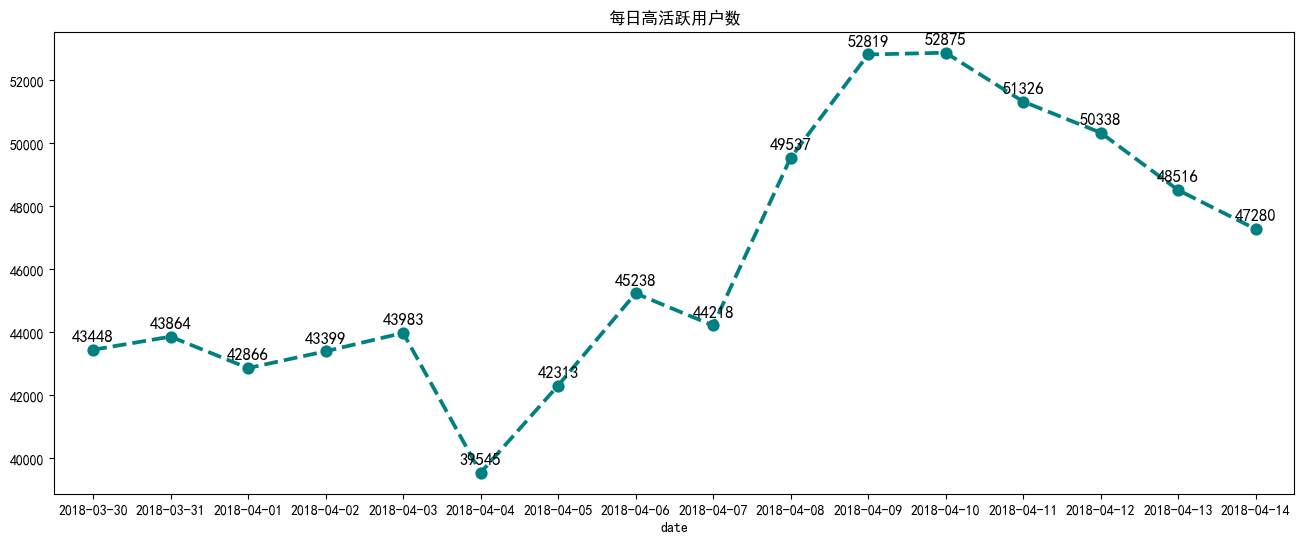

In [59]:
# 可视化：每日高活用户数
# 创建图表并设置大小
fig,ax = plt.subplots(figsize=[16,6])
# 绘制点线图
sns.pointplot(
    x=dau3_num.index,
    y=dau3_num.values,
    markers='o',
    linestyle='--',
    color='teal'
)
# 为图表上的每个数据点添加注释，显示高活跃用户数
x = list(range(0,16))
for a,b in zip(x,dau3_num.values):
    plt.text(a,b+200,'%i'%b,ha='center',va='bottom',fontsize=12)
plt.title('每日高活跃用户数')


In [79]:
# 高活跃用户数累积活跃天数分布
# dau3_df.head()
dau3_cumsum = dau3_df.groupby('user_id')['date'].count()
# dau3_cumsum
# 计算每个用户的累积活跃天数
dau3_df['cumulative_active_days'] =dau3_df.groupby('user_id')['date'].transform('nunique')
# 使用groupby对 dau3_df数据按'user_id'进行分组，计算每个用户的活跃天数（'date'列唯一值数量）
# dau3_df

# 统计不同累积活跃天的用户数量
cumulative_day3_counts = dau3_df.groupby('cumulative_active_days')['user_id'].nunique()
# cumulative_day3_counts
dau3_df

,date,user_id,type,cumulative_active_days
1,2018-03-30,29,45,2
2,2018-03-30,40,6,4
5,2018-03-30,49,10,2
6,2018-03-30,72,18,2
10,2018-03-30,133,3,1
...,...,...,...,...
1685115,2018-04-14,1608559,5,1
1685117,2018-04-14,1608618,6,2
1685118,2018-04-14,1608644,4,2
1685120,2018-04-14,1608669,3,9


Text(0.5, 1.0, '累积活跃天数分布')

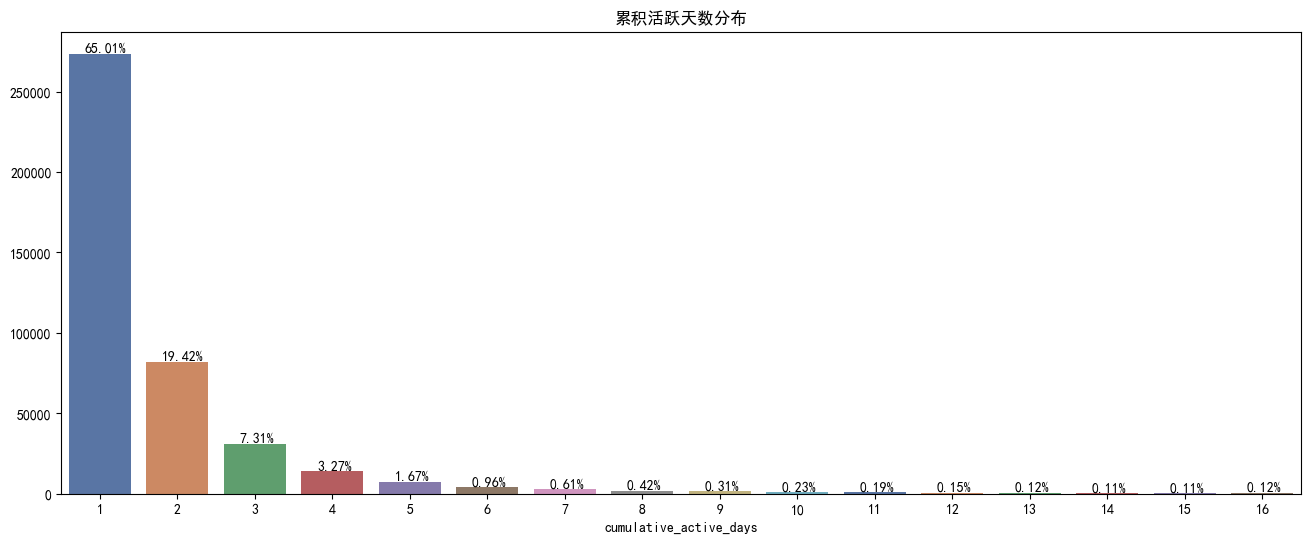

In [78]:
# 可视化绘制累积活跃天数分布
fig,ax=plt.subplots(figsize=[16,6])
# 绘制柱状图（条形）
sns.barplot(
    x=cumulative_day3_counts.index,
    y=cumulative_day3_counts.values,
    palette='deep',
    hue=cumulative_day3_counts.index,
    legend=False
)

for p in ax.patches:
    # annotate在条形上方添加注释
    ax.annotate(
        # 计算百分比格式化小数后保留2位
        '{:.2f}%'.format(100* p.get_height() / len(dau3_cumsum.values)),
        # 设置注释的位置
        (p.get_x() + 0.2,p.get_height()+1000)
    )

plt.title('累积活跃天数分布')


In [82]:
# 每日浏览量分布
# behavior.head()
# 每日浏览量
pv_daily = behavior[behavior['type'] == 'pv'].groupby('date')['user_id'].count()
# pv_daily

# 每日访客数
uv_daily = behavior.groupby('date')['user_id'].nunique()
# uv_daily

date
2018-03-30    105562
2018-03-31    103626
2018-04-01    102604
2018-04-02    105061
2018-04-03    108092
2018-04-04     97015
2018-04-05     99207
2018-04-06    107025
2018-04-07    104609
2018-04-08    105819
2018-04-09    110950
2018-04-10    110828
2018-04-11    110850
2018-04-12    107958
2018-04-13    104145
2018-04-14    101774
Name: user_id, dtype: int64

Text(0.5, 1.0, '每日浏览量分布')

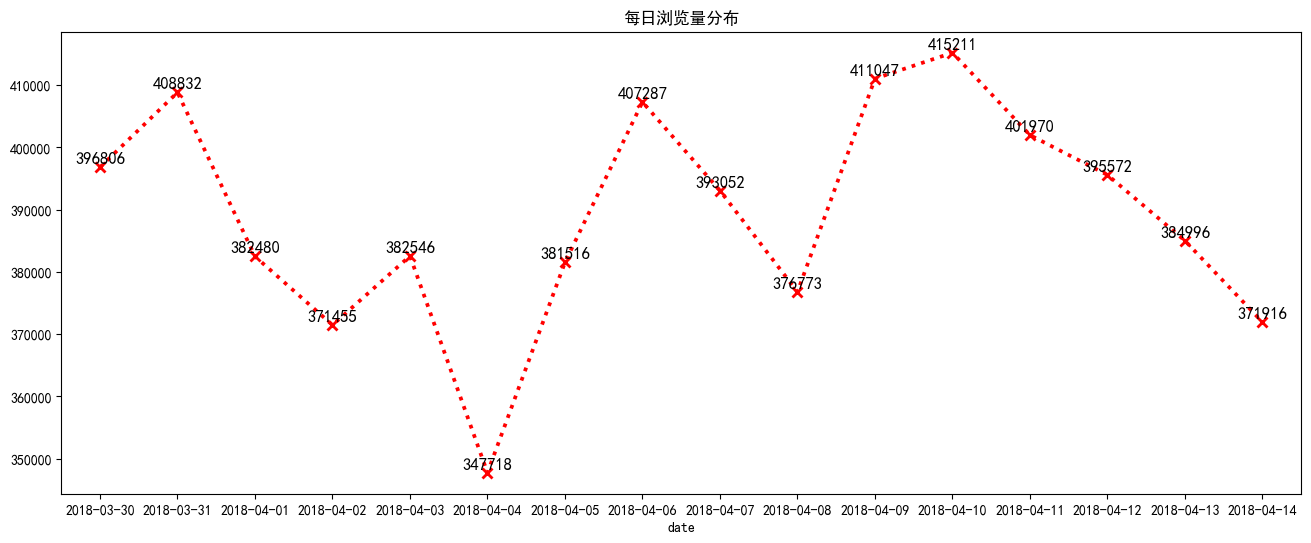

In [90]:
# 可视化：每日浏览量分布
# pv_daily
# 创建图表大小
fig,ax = plt.subplots(figsize=[16,6])

# 绘制点线图
sns.pointplot(
    x=pv_daily.index,
    y=pv_daily.values,
    markers='x',
    linestyles=':',
    color='red'
)
x = list(range(0,16))
for a,b in zip(x,pv_daily.values):
    plt.text(a,b+300,'%i'%b,ha='center',va='bottom',fontsize=12)

plt.title('每日浏览量分布')


Text(0.5, 1.0, '每日访客数')

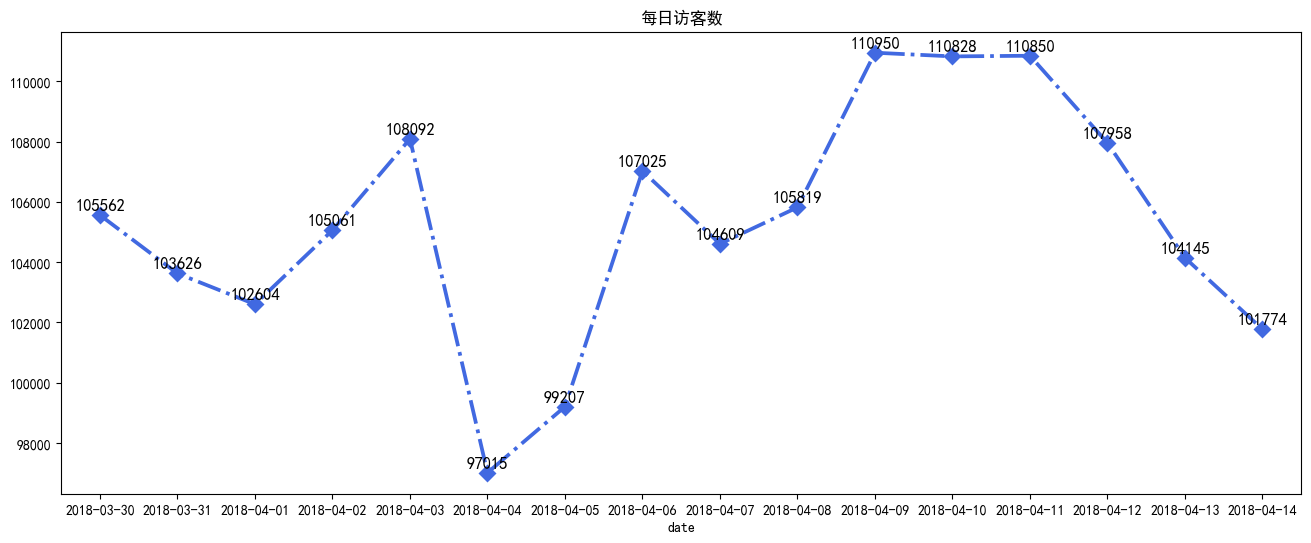

In [96]:
# 可视化：每日访客数
# uv_daily
fig,ax = plt.subplots(figsize=[16,6])

# 绘制点线图
sns.pointplot(
    x=uv_daily.index,
    y=uv_daily.values,
    markers='D',
    linestyles='-.',
    color='RoyalBlue'
)
x = list(range(0,16))
for a,b in zip(x,uv_daily.values):
    plt.text(a,b+100,'%i'%b,ha='center',va='bottom',fontsize=12)

plt.title('每日访客数')


In [99]:
# 每小时的浏览量
# behavior.head()
pv_hourly = behavior[behavior['type']=='pv'].groupby('hour')['user_id'].count()
# pv_hourly
# 每时的访客数
uv_hourly = behavior.groupby('hour')['user_id'].nunique()
# uv_hourly

hour
0      54547
1      25450
2      14329
3      10343
4       9737
5      15863
6      39166
7      62248
8      88137
9     109535
10    122096
11    115984
12    111592
13    111212
14    111375
15    111701
16    111336
17    104562
18    100269
19    105645
20    119894
21    127645
22    124136
23     88714
Name: user_id, dtype: int64

Text(0.5, 1.0, '浏览量随小时的变化情况分布')

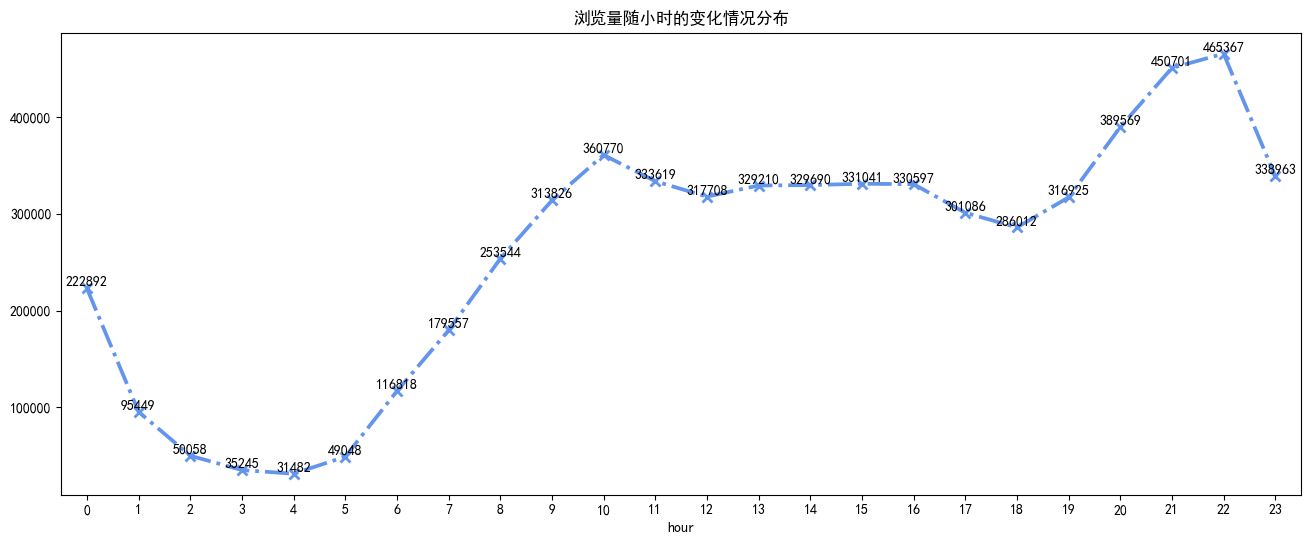

In [107]:
#可视化： 浏览量随小时的变化情况分布
# pv_hourly
fig,ax = plt.subplots(figsize=[16,6])

# 绘制点线图 
sns.pointplot(
    x=pv_hourly.index,
    y=pv_hourly.values,
    markers='x',
    linestyles='-.',
    color='CornflowerBlue'
)
# x = list(range(0,24))
for a,b in zip(pv_hourly.index,pv_hourly.values):
    plt.text(a,b+100,'%i'%b,ha='center',va='bottom',fontsize=10)

plt.title('浏览量随小时的变化情况分布')

Text(0.5, 1.0, '访客随小时的变化情况分布')

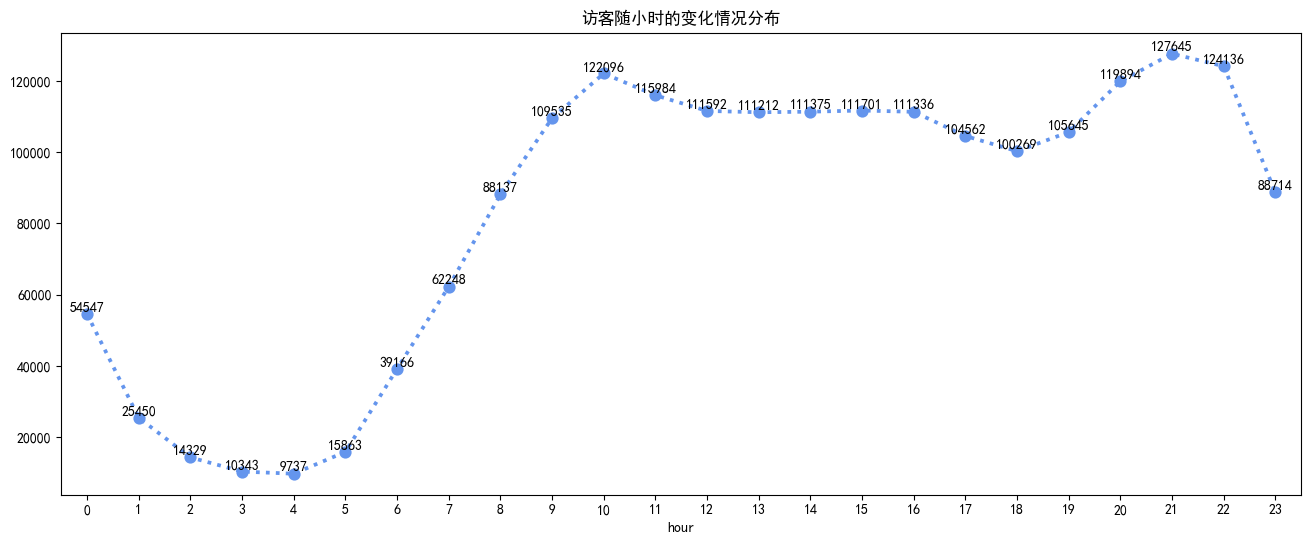

In [112]:
# 访客随小时的变化情况分布

uv_hourly
fig,ax = plt.subplots(figsize=[16,6])

# 绘制点线图 
sns.pointplot(
    x=uv_hourly.index,
    y=uv_hourly.values,
    markers='o',
    linestyles=':',
    color='CornflowerBlue'
)
# x = list(range(0,24))
for a,b in zip(uv_hourly.index,uv_hourly.values):
    plt.text(a,b+100,'%i'%b,ha='center',va='bottom',fontsize=10)

plt.title('访客随小时的变化情况分布')

In [124]:
#用户各操作随小时变化
behavior.head()
# pivot_table 数据透视
type_detail_hour = pd.pivot_table(columns='type',index='hour',data=behavior,aggfunc=np.size,values='user_id')
# type_detail_hour


# 用户各操作随星期变化
type_detail_weekday = pd.pivot_table(columns='type',index='weekday',data=behavior,aggfunc=np.size,values='user_id')
# type_detail_weekday = type_detail_weekday.reset_index(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
type_detail_weekday = type_detail_weekday.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
# type_detail_weekday

type,cart,comm,fav,pay,pv
weekday,,,,,
Monday,83095,27061,12118,61443,782502
Tuesday,82826,25597,12040,62980,797757
Wednesday,78852,24739,11839,58096,749688
Thursday,76992,24052,12401,59208,777088
Friday,73335,37066,18318,89172,1189089
Saturday,70211,36282,17866,90472,1173800
Sunday,68579,25602,12197,58778,759253


In [134]:
# type_detail_hour转换成长格式并重命名列名

tdh_line = type_detail_hour.stack().reset_index().rename(columns={0:'Value'})


# type_detail_weekday转换成长格式并重命名列名
tdw_line = type_detail_weekday.stack().reset_index().rename(columns={0:'Value'})
# tdw_line

# 过滤掉type列为pv的行
tdh_line = tdh_line[~(tdh_line['type']=='pv')]
# tdh_line

tdw_line = tdw_line[~(tdw_line['type']=='pv')]
# tdw_line

,weekday,type,Value
0,Monday,cart,83095
1,Monday,comm,27061
2,Monday,fav,12118
3,Monday,pay,61443
5,Tuesday,cart,82826
6,Tuesday,comm,25597
7,Tuesday,fav,12040
8,Tuesday,pay,62980
10,Wednesday,cart,78852
11,Wednesday,comm,24739


Text(0.5, 1.0, '用户操作随小时变化')

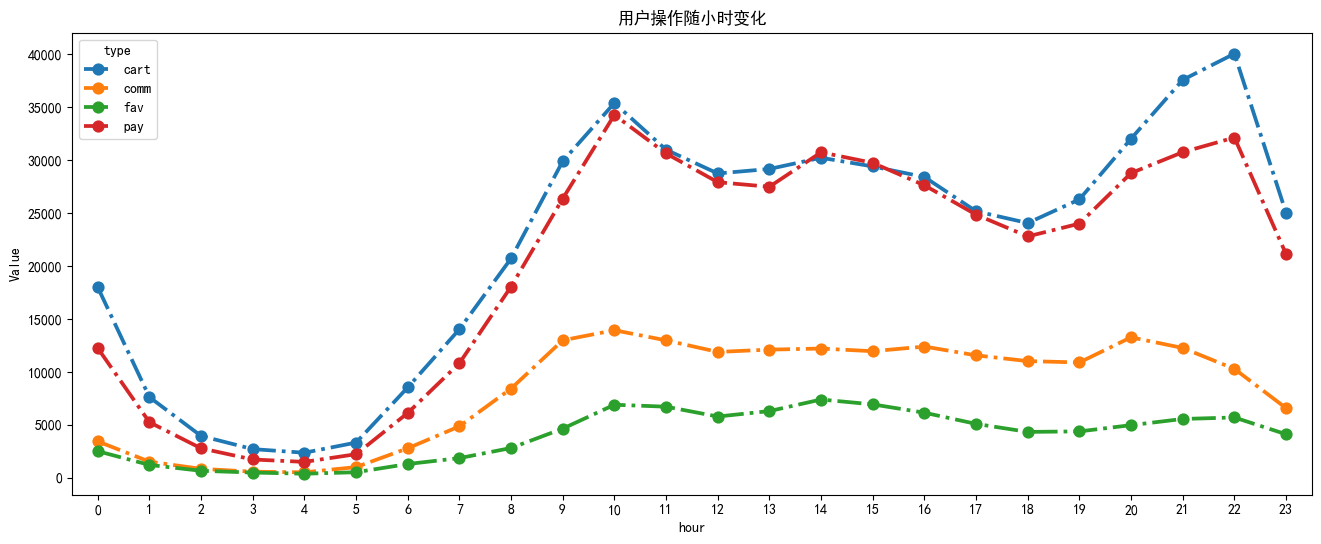

In [135]:
# 可视化：用户操作随小时变化

# 创建图表大小
fig,ax = plt.subplots(figsize=[16,6])
sns.pointplot(
    x='hour',
    y='Value',
    hue='type',
    data=tdh_line,
    linestyles='-.'
)

plt.title('用户操作随小时变化')



Text(0.5, 1.0, '用户操作随星期变化')

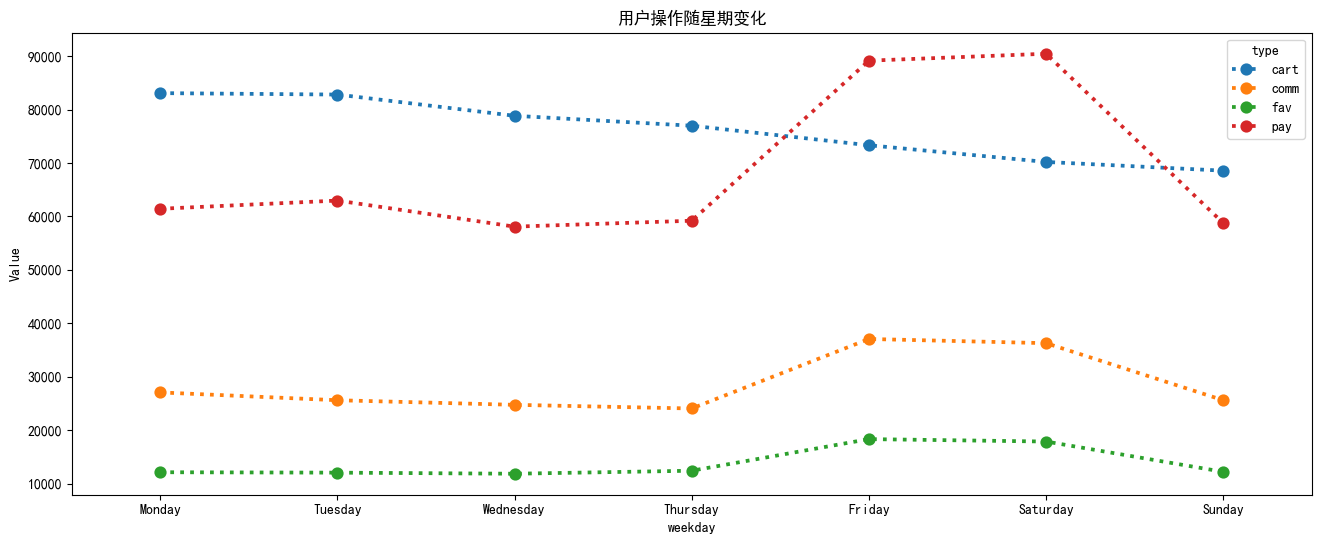

In [137]:
# 可视化 用户操作随星期变化
fig,ax = plt.subplots(figsize=[16,6])
sns.pointplot(
    x='weekday',
    y='Value',
    hue='type',
    data=tdw_line,
    linestyles=':'
)

plt.title('用户操作随星期变化')

## 2.4 用户行为转换漏斗

In [176]:
# 导入相关包
from pyecharts import options as opts
from pyecharts.charts import Funnel
#在jupyter notebook中显示html
from IPython.display import IFrame
import math

In [145]:
behavior.head()
# behavior.info()
# %Y-%m-%d %H:%M:%S
# YYYY-MM-DD
behavior['action_time'] = pd.to_datetime(behavior['action_time'],format='%Y-%m-%d %H:%M:%S')
behavior.head()

,user_id,sku_id,action_time,type,date,hour,weekday
0,1455298,208441,2018-04-11 15:21:43,pv,2018-04-11,15,Wednesday
1,1455298,334318,2018-04-11 15:14:54,pv,2018-04-11,15,Wednesday
2,1455298,237755,2018-04-11 15:14:13,pv,2018-04-11,15,Wednesday
3,1455298,6422,2018-04-11 15:22:25,pv,2018-04-11,15,Wednesday
4,1455298,268566,2018-04-11 15:14:26,pv,2018-04-11,15,Wednesday


In [150]:
# 行为类型分布
# value_counts 统计type列中每种行为出现从次数
type_dis = behavior['type'].value_counts().reset_index()

# 重命名列名
type_dis.columns = ['type','count']
# type_dis

# 计算每种行为类型的比例（占总行为的比例），保留三位小数
# round()

type_dis['rate'] = round(type_dis['count'] / type_dis['count'].sum(),3)
type_dis

,type,count,rate
0,pv,6229177,0.826
1,cart,533890,0.071
2,pay,480149,0.064
3,comm,200399,0.027
4,fav,96779,0.013


In [151]:
# 使用style.bar()
type_dis.style.bar(color='Gold',subset=['rate'])

,type,count,rate
0,pv,6229177,0.826000
1,cart,533890,0.071000
2,pay,480149,0.064000
3,comm,200399,0.027000
4,fav,96779,0.013000


In [154]:
behavior.head()
# 创建数据框 df_con ,包含：user_id sku_id action_time type
df_con = behavior[['user_id','sku_id','action_time','type']]
df_con.head()

,user_id,sku_id,action_time,type
0,1455298,208441,2018-04-11 15:21:43,pv
1,1455298,334318,2018-04-11 15:14:54,pv
2,1455298,237755,2018-04-11 15:14:13,pv
3,1455298,6422,2018-04-11 15:22:25,pv
4,1455298,268566,2018-04-11 15:14:26,pv


In [161]:
# 根据行为类型筛选数据

# 提取浏览 pv
df_pv = df_con[df_con['type']=='pv']
# df_pv.head()
# 提取收藏/关注 fav
df_fav = df_con[df_con['type']=='fav']
# 提取购物车 cart
df_cart = df_con[df_con['type']=='cart']
# 提取评论comm
df_comm = df_con[df_con['type']=='comm']
# 提取支付 pay
df_pay = df_con[df_con['type']=='pay']

# 提取各行为类型对应的唯一用户ID
df_pv_uid = df_con[df_con['type']=='pv']['user_id'].unique()
# df_pv_uid
df_fav_uid = df_con[df_con['type']=='fav']['user_id'].unique()
# df_fav_uid
df_cart_uid = df_con[df_con['type']=='cart']['user_id'].unique()
# df_cart_uid
df_pay_uid = df_con[df_con['type']=='pay']['user_id'].unique()
# df_pay_uid 
df_comm_uid = df_con[df_con['type']=='comm']['user_id'].unique()
# df_comm_uid

array([1410298,  683560,  991266, ...,   56847,  166134, 1023202],
      shape=(127112,))

### pv-pay(浏览和支付行为漏斗)

In [164]:
# 浏览和支付的合并
# 内连接
pv_pay_df = pd.merge(left=df_pv,right=df_pay,how='inner',on=['user_id','sku_id'],suffixes=['_pv','_pay'])
pv_pay_df

# 

,user_id,sku_id,action_time_pv,type_pv,action_time_pay,type_pay
0,1455298,334318,2018-04-11 15:14:54,pv,2018-04-11 15:26:42,pay
1,669643,194478,2018-04-08 19:24:05,pv,2018-04-12 12:33:06,pay
2,1177411,211864,2018-04-09 06:11:22,pv,2018-04-09 06:14:57,pay
3,742645,33865,2018-04-02 00:14:01,pv,2018-04-02 00:22:42,pay
4,1165977,85584,2018-04-07 10:45:57,pv,2018-04-05 14:29:00,pay
...,...,...,...,...,...,...
747391,1497673,333871,2018-04-12 11:05:02,pv,2018-04-12 11:15:25,pay
747392,379252,77059,2018-04-13 17:15:33,pv,2018-04-14 14:38:16,pay
747393,290612,93842,2018-03-30 13:34:43,pv,2018-03-30 10:26:39,pay
747394,136217,353012,2018-04-02 10:22:14,pv,2018-04-02 15:55:39,pay


In [169]:
# 计算独立用户（唯一用户数）
uv = behavior['user_id'].nunique()
# 计算浏览并支付的独立用户数
pv_pay_num = pv_pay_df['user_id'].nunique()
# pv_pay_num  # 312329

# 创建包含浏览和支付类型及对应数量的数据框
pv_pay_data = pd.DataFrame({'type':['浏览','支付'],'num':[uv,pv_pay_num]})
# a = pv_pay_data['num'] / pv_pay_data['num'][0]
# a
# 计算转换率并添加到数据框中
pv_pay_data['con_rates'] = (round(pv_pay_data['num'] / pv_pay_data['num'][0],4) * 100)
pv_pay_data

,type,num,con_rates
0,浏览,728959,100.00
1,支付,312329,42.85


In [174]:
# 浏览-支付漏斗
# 提取type列并转成列表
attr1 = list(pv_pay_data.type)  # ['浏览', '支付']
# 提取con_rates列并转成列表
values1 = list(pv_pay_data.con_rates)  # [100.0, 42.85]

# 将attr1 和 values1中每个值按照索引打包为一个列表，并组成一个列表的列表

data1 = [[attr1[i] ,values1[i]] for i in range(len(attr1))]
data1

[['浏览', 100.0], ['支付', 42.85]]

In [188]:
# 创建行为漏斗图，并设置初始选项
pv_pay = (
    Funnel(opts.InitOpts(width='600px',height='300px'))
    .add( # 添加数据到漏斗图中
        series_name="",  # 系列名字为空
        data_pair=data1,   # 系列的数据项
        gap=2,   # 设置（各阶段）图间距
         # 显示名称、转换率
        # trigger触发条件
            # item 当鼠标碰到图表中的数据时就会提示框显示
            # axis 鼠标碰到坐标轴时就会显示提示框显示
            # none 无论鼠标进行何种操作，提示框都会显示
        tooltip_opts = opts.TooltipOpts(trigger='item',formatter="{b}:{c}%"),
        label_opts = opts.LabelOpts(is_show=True,position="inside"),
        # 设置样式选项
        # 漏斗的边框颜色设置为白色，边框的宽度为2
        itemstyle_opts = opts.ItemStyleOpts(border_color="#F0F8FF",border_width=2)
        
    )
    # 设置全局选项
    .set_global_opts(title_opts=opts.TitleOpts(title="用户行为转换漏斗图"))
)


# 注意：pyecharts出的结果图在jupyter notebook中无法渲染
pv_pay.render('用户行为漏斗1.html')


'D:\\pythoncode\\python-learn\\day15_pandas_jd\\用户行为漏斗1.html'

In [189]:
IFrame(src='./用户行为漏斗1.html',width='600px',height='300px')

### pv - cart - pay（浏览-购物车-支付）

In [196]:
pv_cart_df = pd.merge(left=df_pv,right=df_cart,how='inner',on=['user_id','sku_id'],suffixes=('_pv','_cart'))

# 筛选出浏览时间早于购物时间的数据
pv_cart_df = pv_cart_df[pv_cart_df['action_time_pv'] < pv_cart_df['action_time_cart']]
# pv_cart_df

# 将浏览、购物车、支付数据进行内连接
pv_cart_pay_df = pd.merge(left=pv_cart_df,right=df_pay,on=['user_id','sku_id'])
# 筛选
pv_cart_pay_df = pv_cart_pay_df[pv_cart_pay_df['action_time_cart'] < pv_cart_pay_df['action_time']]
# pv_cart_pay_df


,user_id,sku_id,action_time_pv,type_pv,action_time_cart,type_cart,action_time,type
0,1455298,334318,2018-04-11 15:14:54,pv,2018-04-11 15:21:38,cart,2018-04-11 15:26:42,pay
1,1177411,211864,2018-04-09 06:11:22,pv,2018-04-09 06:12:39,cart,2018-04-09 06:14:57,pay
2,1177411,211864,2018-04-09 06:11:22,pv,2018-04-09 06:14:33,cart,2018-04-09 06:14:57,pay
3,1465052,188611,2018-04-08 20:30:27,pv,2018-04-08 20:30:33,cart,2018-04-08 20:30:49,pay
5,1103962,37707,2018-04-11 13:29:53,pv,2018-04-11 16:04:06,cart,2018-04-11 16:04:41,pay
...,...,...,...,...,...,...,...,...
322912,36536,124540,2018-04-09 21:17:23,pv,2018-04-09 21:18:44,cart,2018-04-10 04:17:55,pay
322913,1275104,207821,2018-04-11 17:49:19,pv,2018-04-11 17:49:25,cart,2018-04-11 17:50:03,pay
322914,1548064,317969,2018-04-12 08:58:31,pv,2018-04-12 08:58:53,cart,2018-04-12 08:59:19,pay
322915,1497673,333871,2018-04-12 11:05:02,pv,2018-04-12 11:15:05,cart,2018-04-12 11:15:25,pay


In [201]:
# 计算唯一用户数
uv = behavior['user_id'].nunique()  # 728959

# 计算加入购物车的用户数
pv_cart_num = pv_cart_df['user_id'].nunique()  # 177617
# pv_cart_num

# 计算加入购物车并付款的用户数
pv_cart_pay_num = pv_cart_pay_df['user_id'].nunique()  # 106061
# pv_cart_pay_num

# 创建包含浏览、加入购物车、支付数据框
pv_cart_pay_data = pd.DataFrame({'type':['浏览','加购','支付'],'num':[uv,pv_cart_num,pv_cart_pay_num]})
# pv_cart_pay_data

# 计算转换率
pv_cart_pay_data['con_rate'] = (round(pv_cart_pay_data['num'] / pv_cart_pay_data['num'][0],4) * 100)
pv_cart_pay_data

,type,num,con_rate
0,浏览,728959,100.00
1,加购,177617,24.37
2,支付,106061,14.55


In [203]:
# 提取type
attr2 = list(pv_cart_pay_data.type)
# 提取转换率
values2 = list(pv_cart_pay_data.con_rate)

data2 = [[attr2[i],values2[i]]for i in range(len(attr2))]
data2

[['浏览', 100.0], ['加购', 24.37], ['支付', 14.549999999999999]]

In [206]:
# 创建用户行为漏斗：pv-cart-pay
# 创建行为漏斗图，并设置初始选项
pv_cart_pay = (
    Funnel(opts.InitOpts(width='600px',height='300px'))
    .add( # 添加数据到漏斗图中
        series_name="",  # 系列名字为空
        data_pair=data2,   # 系列的数据项
        gap=2,   # 设置（各阶段）图间距
         # 显示名称、转换率
        # trigger触发条件
            # item 当鼠标碰到图表中的数据时就会提示框显示
            # axis 鼠标碰到坐标轴时就会显示提示框显示
            # none 无论鼠标进行何种操作，提示框都会显示
        tooltip_opts = opts.TooltipOpts(trigger='item',formatter="{b}:{c}%"),
        label_opts = opts.LabelOpts(is_show=True,position="inside"),
        # 设置样式选项
        # 漏斗的边框颜色设置为白色，边框的宽度为2
        itemstyle_opts = opts.ItemStyleOpts(border_color="#F0F8FF",border_width=2)
        
    )
    # 设置全局选项
    .set_global_opts(title_opts=opts.TitleOpts(title="用户行为转换漏斗图"))
)


# 注意：pyecharts出的结果图在jupyter notebook中无法渲染
pv_cart_pay.render('用户行为漏斗2.html')


'D:\\pythoncode\\python-learn\\day15_pandas_jd\\用户行为漏斗2.html'

In [207]:
IFrame(src='./用户行为漏斗2.html',width='600px',height='300px')

## 2.5 用户留存率分析

In [215]:
# 留存率
# 第一天
# behavior.head()
first_day = datetime.date(datetime.strptime('2018-03-30','%Y-%m-%d'))
# 第五天
fifth_day = datetime.date(datetime.strptime('2018-04-03','%Y-%m-%d'))
# 第十天
tenth_day = datetime.date(datetime.strptime('2018-04-08','%Y-%m-%d'))
# 第十五天
fifteenth_day = datetime.date(datetime.strptime('2018-04-13','%Y-%m-%d'))

# 第一天的用户数
user_num_first = behavior[behavior['date'] == first_day]['user_id'].to_frame()
# user_num_first

# 第五天的用户数
user_num_fifth = behavior[behavior['date'] == fifth_day]['user_id'].to_frame()
# user_num_fifth
# 第十天的用户数
user_num_tenth = behavior[behavior['date'] == tenth_day]['user_id'].to_frame()

# 第十五天的用户数 
user_num_fifteenth = behavior[behavior['date'] == fifteenth_day]['user_id'].to_frame()

In [217]:
# 计算第五天的留存率
fifth_day_ret_rate = round((pd.merge(user_num_first,user_num_fifth).nunique() / user_num_first.nunique()),4).user_id
# fifth_day_ret_rate

# 计算第十天的留存率
tenth_day_ret_rate = round((pd.merge(user_num_first,user_num_tenth).nunique() / user_num_first.nunique()),4).user_id
# tenth_day_ret_rate

# 计算第十五天的留存率
fifteenth_day_ret_rate = round((pd.merge(user_num_first,user_num_fifteenth).nunique() / user_num_first.nunique()),4).user_id
# fifteenth_day_ret_rate

np.float64(0.1744)

Text(0.5, 1.0, '用户留存率可视化')

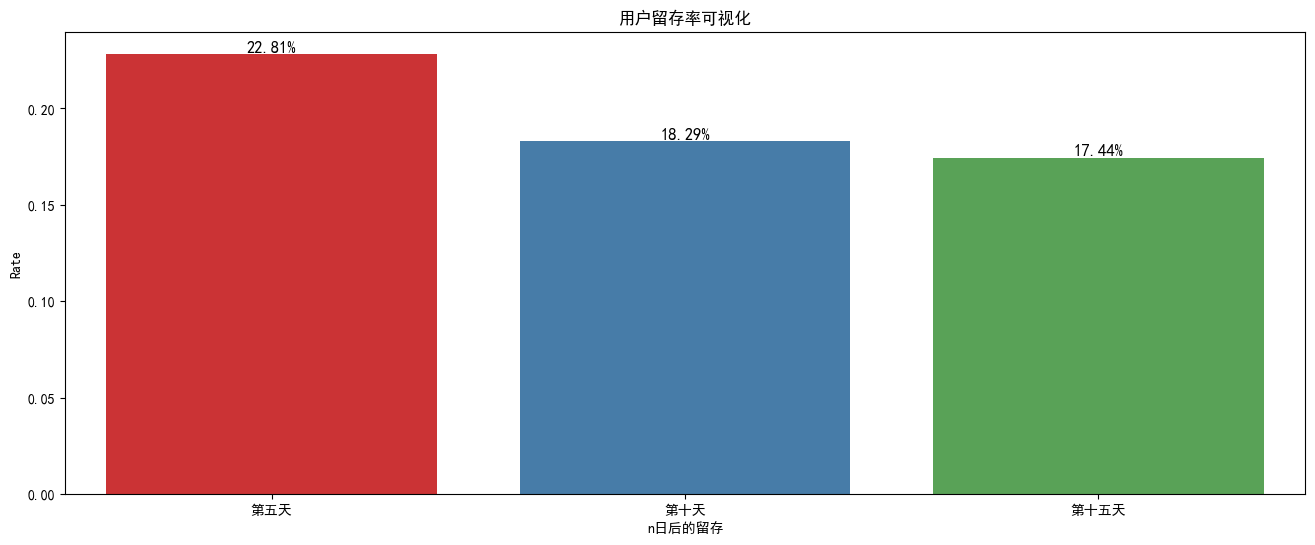

In [220]:
# 留存率可视化
# 组织留存率为DF
data = {
    'n日后的留存':['第五天','第十天','第十五天'],
    'Rate':[fifth_day_ret_rate,tenth_day_ret_rate,fifteenth_day_ret_rate]
}
ren_rate = pd.DataFrame(data)


# 创建画布大小
fig,ax = plt.subplots(figsize=[16,6])

# 柱状图
sns.barplot(
    x='n日后的留存',
    y='Rate',
    data=ren_rate,
    palette='Set1',
    hue='n日后的留存',
    legend=False
)
x = list(range(0,3))
for a,b in zip(x,ren_rate['Rate']):
    plt.text(a,b,'%.2f%%'%(b*100),ha='center',va='bottom',fontsize=12)


plt.title('用户留存率可视化')

## 2.6 商品销量分析

In [221]:
# 商品的总数  239007
behavior['sku_id'].nunique()

239007

In [231]:
# 商品被购前产生平均操作次数


sku_df = behavior[behavior['sku_id'].isin(behavior[behavior['type'] == 'pay']['sku_id'].unique())].groupby('sku_id')['type'].value_counts().unstack(fill_value=0)
# 添加新的列（操作的总次数）
sku_df['total'] = sku_df.sum(axis=1)
# 平均支付的
sku_df['avg_num'] = round((sku_df['pay'] / sku_df['total']),2)


type,cart,comm,fav,pay,pv,total,avg_num
sku_id,,,,,,,
13,0,0,0,1,8,9,0.11
17,1,1,0,1,12,15,0.07
22,0,0,0,1,3,4,0.25
24,5,0,1,5,50,61,0.08
26,0,1,0,1,28,30,0.03
...,...,...,...,...,...,...,...
378413,0,0,0,1,4,5,0.20
378414,2,1,0,2,14,19,0.11
378422,1,1,0,3,19,24,0.12


Text(0.5, 1.0, '商品被购前产生平均操作次数')

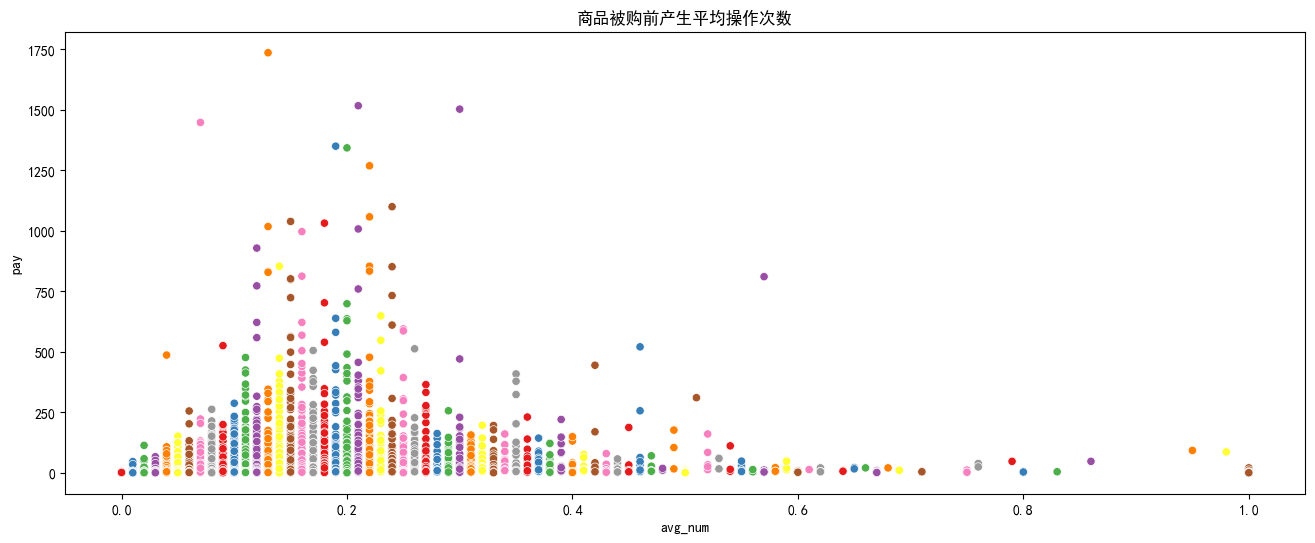

In [236]:
# 绘制商品被购前产生平均操作次数
# 散点图
fig,ax = plt.subplots(figsize=[16,6])

# 散点图
sns.scatterplot(
    x='avg_num',
    y='pay',
    data=sku_df,
    hue='avg_num',
    palette='Set1',
    legend=False
)
plt.title('商品被购前产生平均操作次数')


In [246]:
# 商品销量排行
sku_num = behavior[behavior['type'] == 'pay'].groupby('sku_id')['type'].count().to_frame().rename(columns={'type':'total'}).reset_index()
sku_num
# 筛选商品效率大于1000的商品
topsu = sku_num[sku_num['total'] > 1000].sort_values(by='total',).sort_values(by='total',ascending=False).set_index('sku_id')

# 单个用户共购买商品种数
sku_num_per_user = (behavior[behavior['type'] == 'pay']).groupby('user_id')['sku_id'].nunique()
# sku_num_per_user
topsu.style.bar(color='red',subset=['total'])

,total
sku_id,
152092,1736
37284,1517
232801,1503
224207,1448
44024,1350
327151,1343
125519,1269
83032,1100
261934,1058


## 2.7 RFM用户分层


In [248]:
# RFM,本数据缺少M（金额），只对RF做处理，R(距离最近一次交易时间)、F(交易频率)
# behavior.head()
pay_group = behavior[behavior['type']=='pay'].groupby('user_id')['date']

# 

In [253]:
# 将2018-04-13作为用户最后一次购买时间
final_day = datetime.date(datetime.strptime('2018-04-13','%Y-%m-%d'))
# final_day  # (2018, 4, 13)
# # 最近一次购物时间
ren_pay_time = pay_group.apply(lambda x:final_day - x.max())
ren_pay_time = ren_pay_time.reset_index().rename(columns={'date':'ren'})
ren_pay_time

,user_id,ren
0,2,-1 days
1,10,3 days
2,11,5 days
3,12,0 days
4,14,5 days
...,...,...
395869,1608695,3 days
395870,1608697,0 days
395871,1608704,13 days
395872,1608705,7 days


In [255]:
ren_pay_time['ren'] = ren_pay_time['ren'].map(lambda x:x.days)
# ren_pay_time


AttributeError: 'int' object has no attribute 'days'

In [258]:
# 近十五天内购物频率
pay_freq = pay_group.count().reset_index().rename(columns={'date':'freq'})


,user_id,freq
0,2,1
1,10,1
2,11,2
3,12,1
4,14,1
...,...,...
395869,1608695,1
395870,1608697,1
395871,1608704,1
395872,1608705,1


In [266]:
# 将最近一次和近十五天内购物频率进行合并
RFM = pd.merge(ren_pay_time,pay_freq,on='user_id')
RFM['R'] = pd.qcut(RFM.ren,2,labels=['1','0'])
# qcut 将RFM数据框中的某一列分成两个等分位，并为等分位赋予标签
# 离的近的是 1 离的远的是0
RFM['F'] = pd.qcut(RFM.freq.rank(method='first'),2,labels=['0','1'])
# RFM.freq 排名rank
RFM['RFM'] = RFM['R'].astype(str) + RFM['F'].astype(str)
# RFM

# 给用户打标签
# 01  重要保持客户
# 11   重要价值客户
# 10   重要挽留客户
# 00  一般发展客户
dict_n = {
    '01':'重要保持客户',
    '11':'重要价值客户',
    '10':'重要挽留客户',
    '00':'一般发展客户'
}
RFM['用户等级'] = RFM['RFM'].map(dict_n)
RFM_pie = RFM['用户等级'].value_counts().reset_index()


Text(0.5, 1.0, 'RFM用户分层')

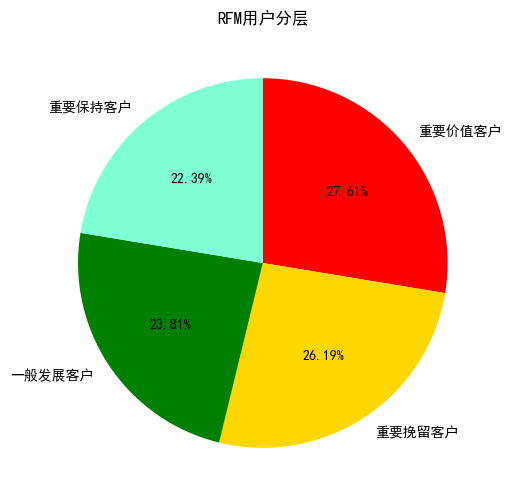

In [270]:
RFM_pie
# 使用饼图绘制RFM
fig,ax = plt.subplots(figsize=[16,6])
plt.pie(
    RFM_pie['count'],
    labels=RFM_pie['用户等级'],
    startangle=90,
    autopct='%.2f%%',
    counterclock=False,
    colors=['Red','Gold','Green','Aquamarine']
)
plt.title('RFM用户分层')